In [76]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
train = pd.read_csv('/content/drive/MyDrive/PROJECTS/ML_FILES/GeoAI/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/PROJECTS/ML_FILES/GeoAI/Test.csv')
Submission = pd.read_csv('/content/drive/MyDrive/PROJECTS/ML_FILES/GeoAI/SampleSubmission.csv')

In [79]:
train.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


#### **Data Preprocessing and Cleaning**

### Exploratory Data Analysis

In [80]:
train.shape

(86584, 14)

(86584, 14)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658

In [82]:
train.describe()

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
count,86584.000000,86584.000000,86584.000000,46798.000000,73709.000000,73709.000000,73709.000000,73709.000000,51111.000000,73709.000000,82051.000000
mean,45.421456,10.014272,2.585528,299.268841,-1.274999,0.200606,0.000045,0.000156,0.000105,16655.112392,24.535051
std,0.225409,1.056637,7.617394,10.927167,0.693003,0.259607,0.000012,0.000103,0.000092,3000.748790,17.108838
min,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000
25%,45.249544,9.195325,0.000000,290.920000,-1.749425,0.023900,0.000034,0.000100,0.000047,14432.114060,11.875000
50%,45.478996,9.611738,0.000000,300.760000,-1.349746,0.078478,0.000047,0.000122,0.000071,16711.190570,20.000000
75%,45.601232,10.683357,0.000000,307.940000,-0.878857,0.278451,0.000056,0.000173,0.000129,19252.648570,33.050000
max,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333


,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
count,86584.000000,86584.000000,86584.000000,46798.000000,73709.000000,73709.000000,73709.000000,73709.000000,51111.000000,73709.000000,82051.000000
mean,45.421456,10.014272,2.585528,299.268841,-1.274999,0.200606,0.000045,0.000156,0.000105,16655.112392,24.535051
std,0.225409,1.056637,7.617394,10.927167,0.693003,0.259607,0.000012,0.000103,0.000092,3000.748790,17.108838
min,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000
25%,45.249544,9.195325,0.000000,290.920000,-1.749425,0.023900,0.000034,0.000100,0.000047,14432.114060,11.875000
50%,45.478996,9.611738,0.000000,300.760000,-1.349746,0.078478,0.000047,0.000122,0.000071,16711.190570,20.000000
75%,45.601232,10.683357,0.000000,307.940000,-0.878857,0.278451,0.000056,0.000173,0.000129,19252.648570,33.050000
max,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333


array([[<Axes: title={'center': 'NO2_strat'}>,
        <Axes: title={'center': 'NO2_total'}>,
        <Axes: title={'center': 'NO2_trop'}>],
       [<Axes: title={'center': 'GT_NO2'}>,
        <Axes: title={'center': 'LAT'}>, <Axes: title={'center': 'LON'}>],
       [<Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'LST'}>, <Axes: title={'center': 'AAI'}>],
       [<Axes: title={'center': 'CloudFraction'}>,
        <Axes: title={'center': 'TropopausePressure'}>, <Axes: >]],
      dtype=object)

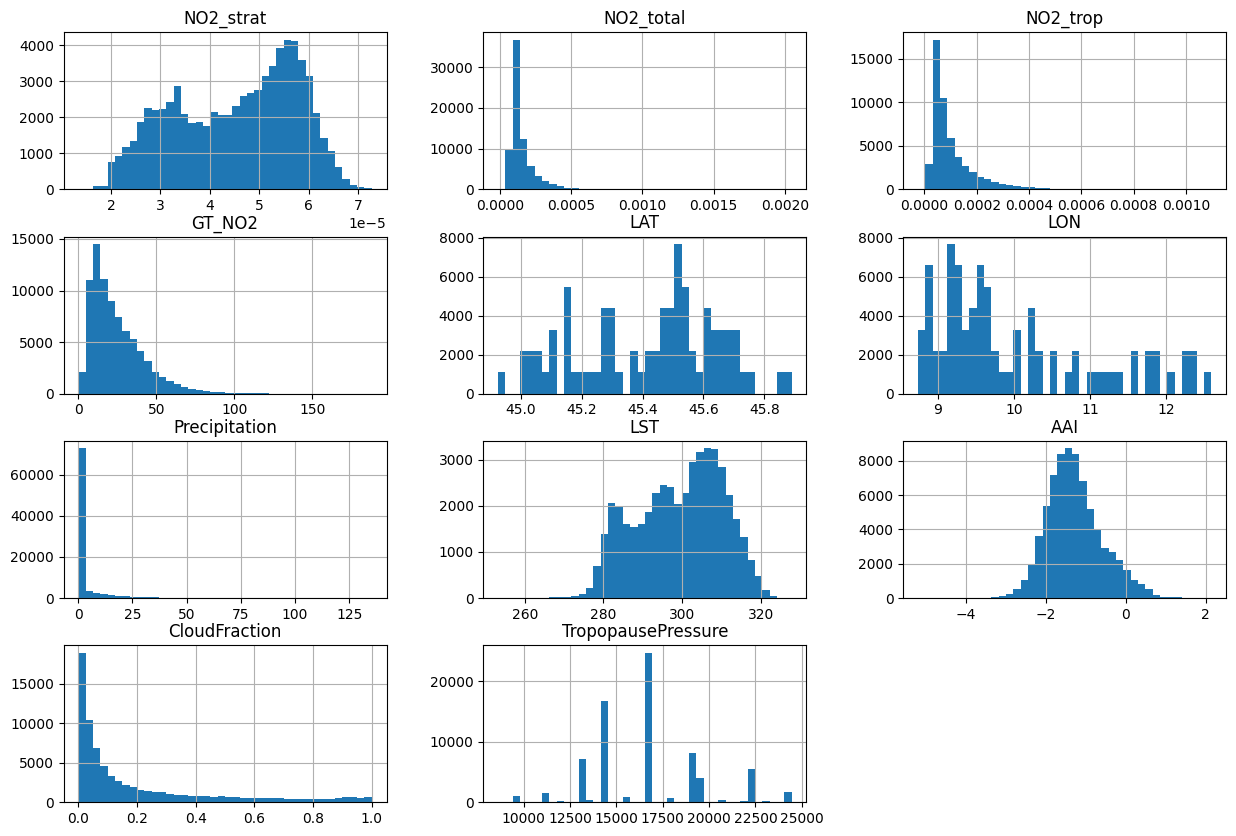

array([[<Axes: title={'center': 'NO2_strat'}>,
        <Axes: title={'center': 'NO2_total'}>,
        <Axes: title={'center': 'NO2_trop'}>],
       [<Axes: title={'center': 'GT_NO2'}>,
        <Axes: title={'center': 'LAT'}>, <Axes: title={'center': 'LON'}>],
       [<Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'LST'}>, <Axes: title={'center': 'AAI'}>],
       [<Axes: title={'center': 'CloudFraction'}>,
        <Axes: title={'center': 'TropopausePressure'}>, <Axes: >]],
      dtype=object)

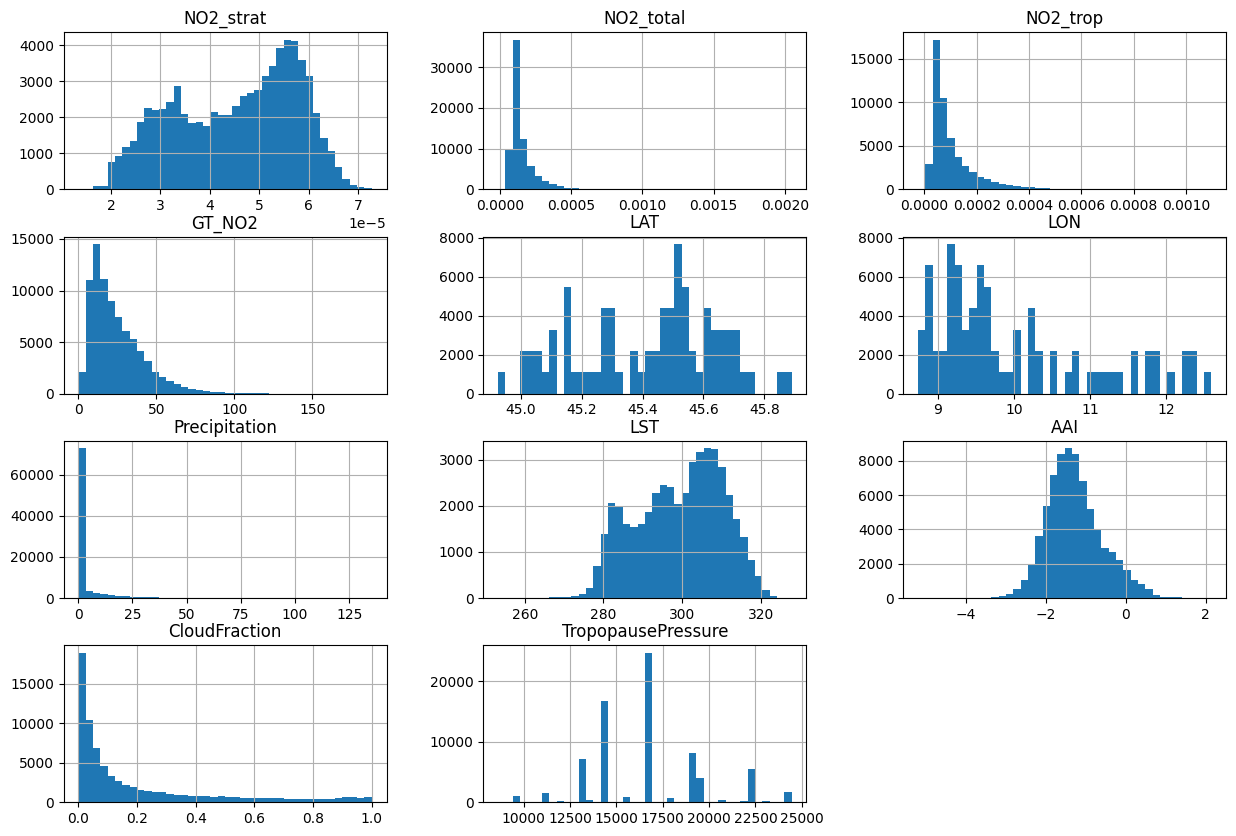

In [83]:
# NO2 data
NO2 = ['NO2_strat',	'NO2_total', 'NO2_trop', 'GT_NO2' ]
Spatial = ['LAT', 'LON']
weather = ['Precipitation', 'LST', 'AAI', 'CloudFraction', 'TropopausePressure']

train[NO2 + Spatial + weather].hist(bins=40, figsize = (15, 10))

Some on the data columns skewed left, showing possibility of variances in the dataset.
Cols; NO2_Total, NO2_Strat, GT_NO2, CloudFraction, and Precipitation.

<Axes: >

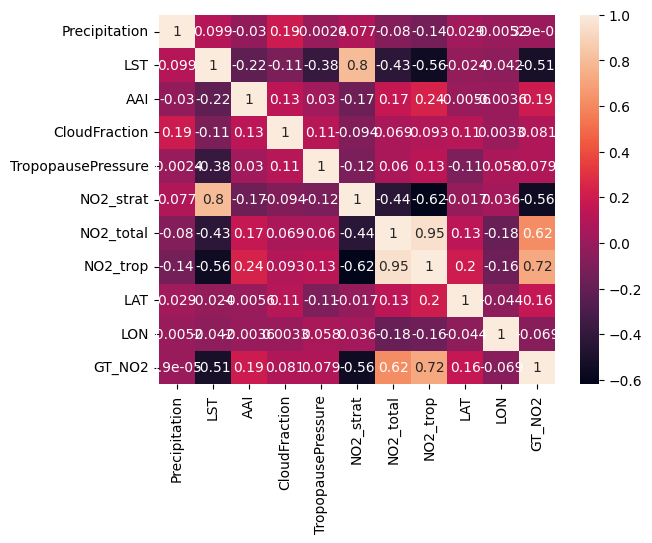

<Axes: >

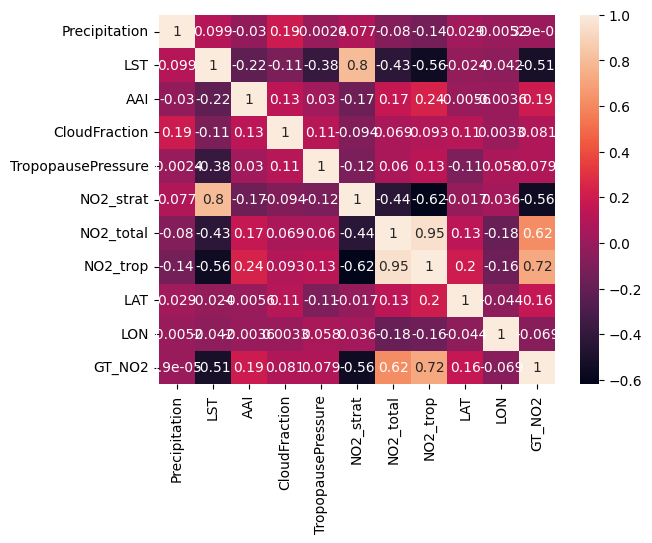

In [84]:
### Exploring correlation between GT_NO2 and other features
cols = ['Precipitation', 'LST', 'AAI', 'CloudFraction', 'TropopausePressure', 'NO2_strat',	'NO2_total', 'NO2_trop',
       'LAT', 'LON', 'GT_NO2']
sns.heatmap(train[cols].corr(method = 'spearman'), annot = True)

In [85]:
train[cols].corr(method = 'spearman')['GT_NO2']

,GT_NO2
Precipitation,0.000039
LST,-0.514948
AAI,0.191536
CloudFraction,0.081338
TropopausePressure,0.079357
NO2_strat,-0.561987
NO2_total,0.617555
NO2_trop,0.721875
LAT,0.164154
LON,-0.069002


,GT_NO2
Precipitation,0.000039
LST,-0.514948
AAI,0.191536
CloudFraction,0.081338
TropopausePressure,0.079357
NO2_strat,-0.561987
NO2_total,0.617555
NO2_trop,0.721875
LAT,0.164154
LON,-0.069002


Correlation of features with the target variables using the spearman. Precipitation, LON, Cloud fraction and TropopausePressure have least correlation score with the target variable.

In [86]:
train[cols].corr(method = 'pearson')['GT_NO2']

,GT_NO2
Precipitation,-0.032344
LST,-0.519646
AAI,0.168820
CloudFraction,0.011319
TropopausePressure,0.048618
NO2_strat,-0.558997
NO2_total,0.596019
NO2_trop,0.726991
LAT,0.175449
LON,-0.102680


,GT_NO2
Precipitation,-0.032344
LST,-0.519646
AAI,0.168820
CloudFraction,0.011319
TropopausePressure,0.048618
NO2_strat,-0.558997
NO2_total,0.596019
NO2_trop,0.726991
LAT,0.175449
LON,-0.102680


For the pearson method, a sligth difference is observed. However, both are indicating similar correlation scores.

#### Identification of missing values and outliers

In [87]:
train.isna().sum()

,0
ID_Zindi,0
Date,0
ID,0
LAT,0
LON,0
Precipitation,0
LST,39786
AAI,12875
CloudFraction,12875
NO2_strat,12875


,0
ID_Zindi,0
Date,0
ID,0
LAT,0
LON,0
Precipitation,0
LST,39786
AAI,12875
CloudFraction,12875
NO2_strat,12875


<Axes: >

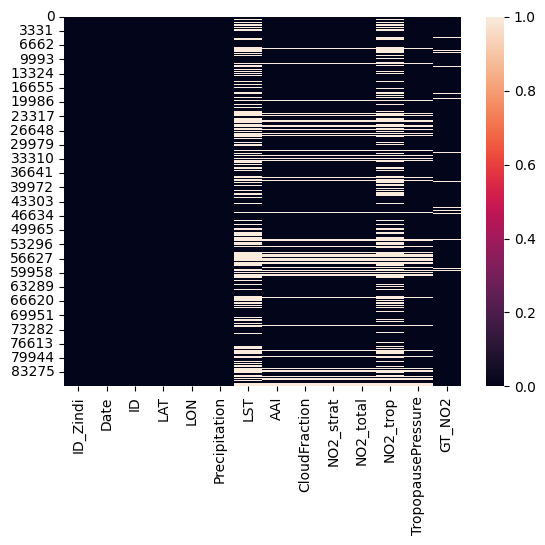

<Axes: >

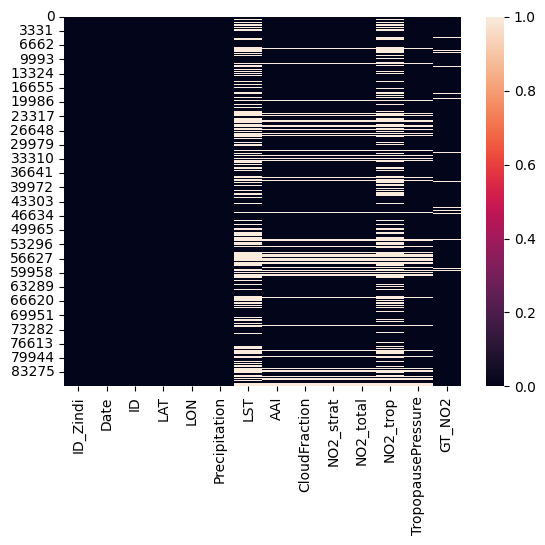

In [88]:
sns.heatmap(train.isnull())

There a lots of missing datapoints, especially at the:
- LST                   3978
- AAI                   12875
- CloudFraction         12875
- NO2_strat             12875
- NO2_total             12875
- NO2_trop              35473
- TropopausePressure    12875

Handling the missing data in [LST, AAI, CloudFraction, NO2_strat, NO2_total, NO2_trop, TropopausePressure, and GT_NO2]
- Using the KNN imputation

In [89]:
from sklearn.impute import KNNImputer
class Cleandata:
    def __init__(self, data, cols):
        self.data = data
        self.cols = cols
    def __str__(self):
        return f'Filled data columns:\n {self.data[self.cols].head()}'

def get_clean(df, col):
    knn_columns = col
    imputer = KNNImputer(n_neighbors = 100)
    df[knn_columns] = imputer.fit_transform(df[knn_columns])
    return Cleandata(df, col)


In [20]:
def main():
    columns = ['AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure', 'GT_NO2', 'LST', 'NO2_trop']
    output = get_clean(train, columns)
    print(output)

if __name__=='__main__':
    main()

Filled data columns:
         AAI  CloudFraction  NO2_strat  NO2_total  TropopausePressure  GT_NO2  \
0  0.230527       0.559117   0.000024   0.000117         14440.82126    31.0   
1 -0.074006       0.869309   0.000024   0.000127         14441.79815    42.0   
2  0.024470       0.674160   0.000024   0.000086         14437.38294    31.0   
3 -0.010442       0.920054   0.000024   0.000124         14440.83831    30.0   
4 -0.176178       0.747464   0.000024   0.000116         14438.79037    58.0   

        LST  NO2_trop  
0  287.5906  0.000163  
1  286.6194  0.000179  
2  291.1504  0.000163  
3  288.4620  0.000158  
4  289.8404  0.000223  


In [21]:
print(train.isna().sum())

ID_Zindi              0
Date                  0
ID                    0
LAT                   0
LON                   0
Precipitation         0
LST                   0
AAI                   0
CloudFraction         0
NO2_strat             0
NO2_total             0
NO2_trop              0
TropopausePressure    0
GT_NO2                0
dtype: int64


In [22]:
#from sklearn.impute import KNNImputer
# Select columns with 5-20% missing values for KNN imputation
#knn_columns = ['AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure', 'GT_NO2', 'LST', 'NO2_trop']
#imputer = KNNImputer(n_neighbors=100) #With 10 neighbours
#train[knn_columns] = imputer.fit_transform(train[knn_columns]) # Fit and transform the imputer on the selected columns

# Recheck
#print(train.isna().sum())

In [23]:
train[['AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure', 'GT_NO2', 'LST', 'NO2_trop']]

,AAI,CloudFraction,NO2_strat,NO2_total,TropopausePressure,GT_NO2,LST,NO2_trop
0,0.230527,0.559117,0.000024,0.000117,14440.821260,31.000,287.5906,0.000163
1,-0.074006,0.869309,0.000024,0.000127,14441.798150,42.000,286.6194,0.000179
2,0.024470,0.674160,0.000024,0.000086,14437.382940,31.000,291.1504,0.000163
3,-0.010442,0.920054,0.000024,0.000124,14440.838310,30.000,288.4620,0.000158
4,-0.176178,0.747464,0.000024,0.000116,14438.790370,58.000,289.8404,0.000223
...,...,...,...,...,...,...,...,...
86579,-0.434350,0.250490,0.000032,0.000643,13063.797700,39.750,289.5126,0.000158
86580,-1.193253,0.188654,0.000040,0.000184,16415.481476,30.125,296.6874,0.000137
86581,-0.157753,0.000000,0.000031,0.000153,13050.164990,28.325,284.9800,0.000122
86582,-0.798636,0.399524,0.000031,0.000717,13061.413290,21.250,304.3380,0.000095


In [24]:
# Selected columns for MICE imputation ('LST' and 'NO2_trop')
#mice_columns = ['LST', 'NO2_trop']

# Create a MICE imputer
#mice_imputer = IterativeImputer(max_iter=100, random_state=0) # You can adjust max_iter
#train[mice_columns] = mice_imputer.fit_transform(train[mice_columns])

#Check if there are still missing values in the training set
#print(train.isna().sum())

In [25]:
# EXtract more time features
train['Date'] = pd.to_datetime(train['Date'])
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year
train['day'] = train['Date'].dt.day
train['Weekday']=train['Date'].dt.weekday

test['Date'] = pd.to_datetime(test['Date']) #format ='%d/%m/%y)
test['month'] = test['Date'].dt.month
test['year'] = test['Date'].dt.year
test['day'] = test['Date'].dt.day
test['Weekday']=test['Date'].dt.weekday

<ipython-input-25-cf3f0167c20c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date'] = pd.to_datetime(train['Date'])
<ipython-input-25-cf3f0167c20c>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Date'] = pd.to_datetime(test['Date']) #format ='%d/%m/%y)


In [26]:
# GETTING THE ANOMOLIES IN TEMPERATURE AND PRESSURE
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

train['season'] = train['month'].apply(get_season)

In [27]:
by_season = train.groupby('season')['GT_NO2'].agg(['mean', 'std'])
by_season

,mean,std
season,,
Fall,26.180946,15.197966
Spring,20.132448,13.846281
Summer,18.174798,13.630446
Winter,33.650665,19.030132


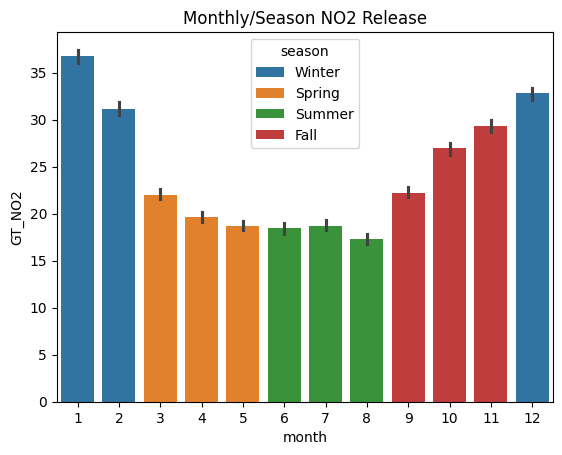

In [28]:
sns.barplot(train, x='month', y='GT_NO2', hue='season', errorbar=('ci', 100))
plt.title('Monthly/Season NO2 Release')
plt.show()

- Winter months (December, January and Februrary) have the highest NO2 discharge),
- followed by fall period (Sept, Oct, and Nov)
- then Spring period (March, April and May) and Finally, Summer (June, July and August)

In [29]:
by_day = train.groupby('Weekday')['GT_NO2'].agg(['mean', 'std'])
by_day

,mean,std
Weekday,,
0,24.902133,16.685745
1,25.153957,17.330617
2,26.270883,17.405384
3,25.794598,17.004499
4,25.485210,17.200879
5,23.098104,15.216942
6,20.685011,15.079856


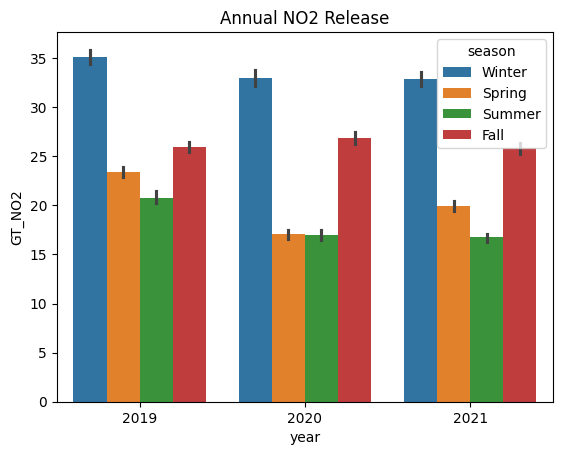

In [30]:
sns.barplot(train, x='year', y='GT_NO2', hue='season', errorbar=('ci', 100))
plt.title('Annual NO2 Release')
plt.show()

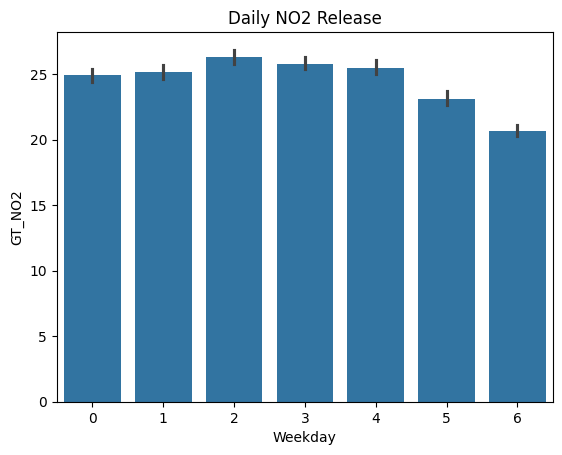

In [31]:
sns.barplot(train, x='Weekday', y='GT_NO2', errorbar=('ci', 100))
plt.title('Daily NO2 Release')
plt.show()

Weekend (saturday: 5, Sunday:6) has the least NO2 records.

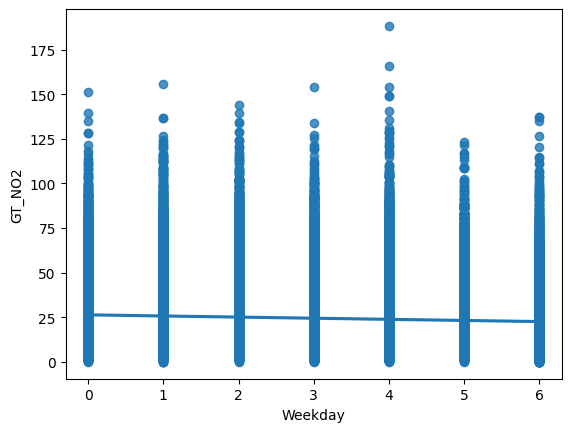

In [32]:
sns.regplot(train, x='Weekday', y= 'GT_NO2')
plt.show()

<ipython-input-33-047e68e26516>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(train, x='Precipitation', y='GT_NO2', palette= sns.color_palette("husl", 2))


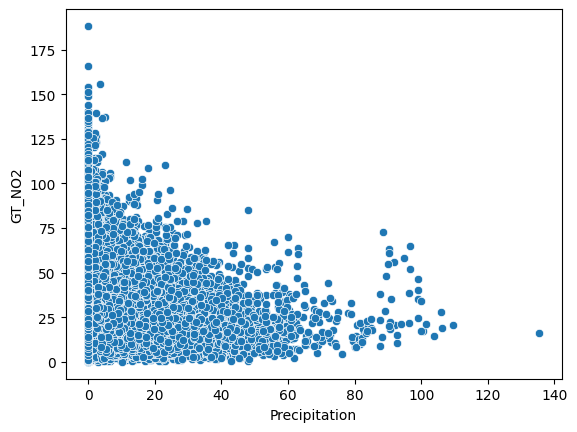

In [33]:

sns.scatterplot(train, x='Precipitation', y='GT_NO2', palette= sns.color_palette("husl", 2))
plt.show()

Checking for the presence of outliers

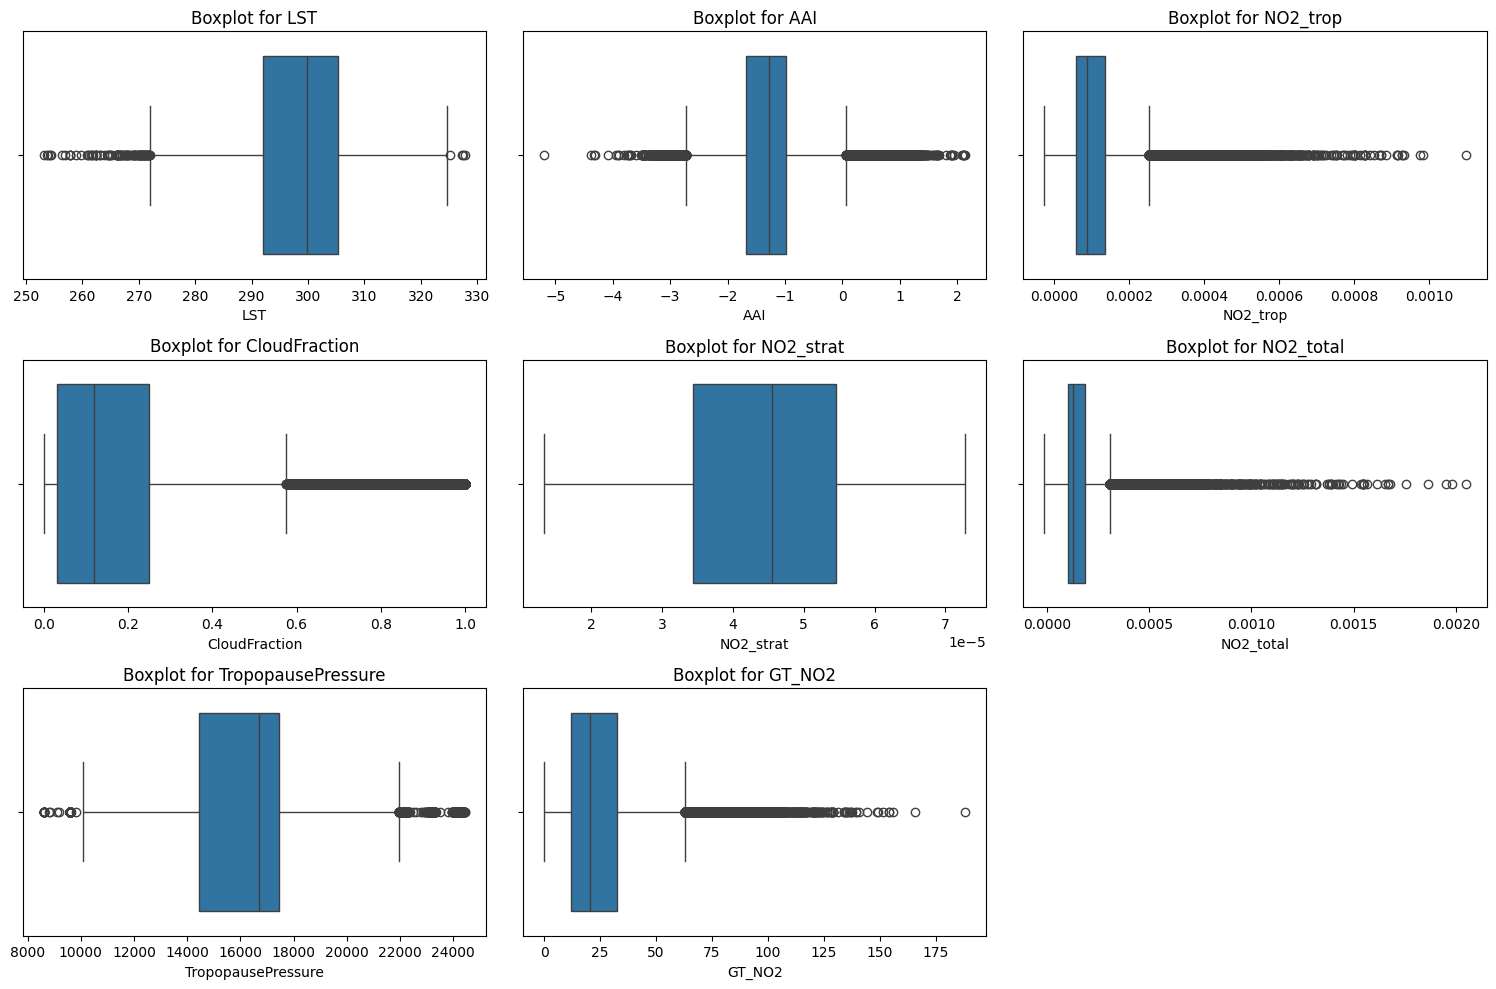

In [34]:
import math

class Outlier:
    def __init__(self, df, col, ax):
        self.df = df
        self.col = col
        self.ax = ax

    def show_outlier(self):
        sns.boxplot(data=self.df, x=self.col, ax=self.ax)
        self.ax.set_title(f'Boxplot for {self.col}')

# Main code for plotting each column in subplots
cols = ['LST', 'AAI', 'NO2_trop', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure', 'GT_NO2']
num_cols = 3  # Number of columns for the subplot grid
num_rows = math.ceil(len(cols) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate over each axis

for i, col in enumerate(cols):
    pt = Outlier(train, col, axes[i])  # Pass the specific subplot axis
    pt.show_outlier()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The outliers present in the dataset is massive, hence a scaling or normalization method will be applied to normalize the data distribution.

In [35]:
# Fill the missing columns of the test dataset
def main():
    cols = ['LST', 'AAI', 'NO2_trop', 'CloudFraction', 'NO2_strat', 'NO2_total', 'TropopausePressure']
    output = get_clean(test, cols)
    print(output)

if __name__=='__main__':
    main()

# Recheck
print(test.isna().sum())

Filled data columns:
         LST       AAI  NO2_trop  CloudFraction  NO2_strat  NO2_total  \
0  290.7712 -0.313361  0.000128       0.771456   0.000024   0.000075   
1  303.9944 -0.229512  0.000069       0.398208   0.000023   0.000120   
2  282.9800 -0.470822  0.000148       0.153694   0.000023   0.000171   
3  288.8786  0.132952  0.000154       0.756917   0.000024   0.000266   
4  289.6124 -0.198272  0.000138       0.678858   0.000023   0.000149   

   TropopausePressure  
0         14440.02819  
1         14434.04790  
2         14427.42478  
3         14443.09006  
4         14440.85840  
ID_Zindi              0
Date                  0
ID                    0
LAT                   0
LON                   0
Precipitation         0
LST                   0
AAI                   0
CloudFraction         0
NO2_strat             0
NO2_total             0
NO2_trop              0
TropopausePressure    0
month                 0
year                  0
day                   0
Weekday          

**Feature Engineering**

In [36]:
# Generating the location distance
mean_lat = np.mean(train['LAT'])
mean_lon = np.mean(train['LON'])

from geopy.distance import geodesic
ref_point = (mean_lat, mean_lon)

In [37]:
train['geo_dist'] = train.apply(lambda row: geodesic((row['LAT'], row['LON']), ref_point).kilometers, axis=1)
train['NO2_ratio'] = train['NO2_trop']/train['NO2_total']
train['Prep_cloud'] = train['Precipitation']* train['CloudFraction']
train['cloud_LST'] =  train['CloudFraction']*train['LST']
train['AAI_NO2']=train['AAI']*train['NO2_total']
train['Trop_LST'] =  train['TropopausePressure']*train['LST']


In [38]:
train.columns

Index(['ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'GT_NO2', 'month', 'year', 'day', 'Weekday',
       'season', 'geo_dist', 'NO2_ratio', 'Prep_cloud', 'cloud_LST', 'AAI_NO2',
       'Trop_LST'],
      dtype='object')

In [39]:
# Generating the location distance
mean_lat = np.mean(test['LAT'])
mean_lon = np.mean(test['LON'])

ref_point = (mean_lat, mean_lon)

test['geo_dist'] = test.apply(lambda row: geodesic((row['LAT'], row['LON']), ref_point).kilometers, axis=1)
test['NO2_ratio'] = test['NO2_trop']/test['NO2_total']
test['Prep_cloud'] = test['Precipitation']* test['CloudFraction']

In [40]:
test['cloud_LST'] =  test['CloudFraction']*test['LST']
test['AAI_NO2'] = test['AAI']*test['NO2_total']
test['Trop_LST'] =  test['TropopausePressure']*test['LST']

In [41]:
#test['season'] = test['month'].apply(get_season)

In [42]:
# Season avg lst
#seasonal_avg = test.groupby('season')['LST'].transform('mean')
#test['temp_anomaly'] = test['LST'] - seasonal_avg

In [43]:
train.columns

Index(['ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'GT_NO2', 'month', 'year', 'day', 'Weekday',
       'season', 'geo_dist', 'NO2_ratio', 'Prep_cloud', 'cloud_LST', 'AAI_NO2',
       'Trop_LST'],
      dtype='object')

In [44]:
#train['season'] = train['season'].apply(lambda x: 1 if x == 'Winter' else 2 if x == 'Spring' else 3 if x == 'Summer' else 4)

In [45]:
x = train.drop(['Date', 'ID_Zindi', 'ID', 'GT_NO2', 'season'], axis = 1)
y = train['GT_NO2']

In [46]:
#from sklearn.feature_selection import SelectKBest, f_regression, RFE

#selector = SelectKBest(f_regression, k=5)  # Select top 5 features
#X_new = selector.fit_transform(x, y)


### Feature Reduction using PCA



In [47]:
#scaler = StandardScaler()
#scaled_x = scaler.fit_transform(x)
#scaled_y = scaler.fit_transform(y.values.reshape(-1, 1))
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_x = scaler.fit_transform(x)


In [48]:
#from sklearn.decomposition import PCA
#pca = PCA()
#pca_x = pca.fit_transform(scaled_x)

In [49]:
## Check for the captured variances

#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.show()


In [50]:
# Optional Step: Identify important features based on loadings
#loading_df = pd.DataFrame(pca.components_.T, index=x.columns, columns=[f'PC{i+1}' for i in range(20)])
#print("Feature loadings on principal components:\n", loading_df)

In [51]:
#from kneed import KneeLocator
# Calculate cumulative explained variance
#cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Find the "elbow" point in the cumulative explained variance plot
#knee = KneeLocator(range(1, len(cumulative_variance) + 1), cumulative_variance, curve="convex", direction="increasing")

# Plot the cumulative explained variance
#plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.axvline(knee.elbow, color='red', linestyle='--', label=f'Elbow at Component {knee.elbow}')
#plt.legend()
#plt.show()

# Step 5: Use the number of components at the elbow point
#n_components = knee.elbow
#print(f"Optimal number of components: {n_components}")

In [52]:
#pca = PCA(n_components=n_components)
#X_reduced = pca.fit_transform(scaled_x)

In [53]:
# Get loadings (feature contributions to each component)
#loadings = pca.components_.T
#loading_df = pd.DataFrame(loadings, index=x.columns, columns=[f'PC{i+1}' for i in range(n_components)])
#print(loading_df)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.22, random_state = 42)

In [55]:
def test_eva(model, tr, pre):
  mse = mean_squared_error(tr, pre)
  mae = mean_absolute_error(tr, pre)
  mape = mean_absolute_percentage_error(tr, pre)
  r2 = r2_score(tr, pre)
  print(pd.DataFrame({'Model': [model], 'MSE': [mse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]}))

In [56]:
# Xgboost
xg = XGBRegressor()
xg.fit(x_train, y_train)
pre = xg.predict(x_test)
test_eva('XGBoost', y_test, pre)

     Model        MSE       MAE          MAPE        R2
0  XGBoost  43.396456  4.437547  7.313163e+12  0.842124


### oPTMIZING XGBOOST

In [57]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 520, 530, 540, 550, 570],
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.05, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.05, 0.1, 1]
}
kfold=KFold(n_splits=5)

xg_search=RandomizedSearchCV(estimator=xg, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=kfold, random_state=101)

xg_search.fit(x_train, y_train)
xg_param=xg_search.best_params_

print(f'xgboost best parameters={xg_param}')

xgboost best parameters={'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 520, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [58]:
xg_best = xg_search.best_estimator_
xg_best.fit(x_train, y_train)
pred2 = xg_best.predict(x_test)
test_eva('XGBoost', y_test, pred2)

     Model        MSE       MAE          MAPE        R2
0  XGBoost  38.751849  4.114057  6.229400e+12  0.859021


In [59]:
## Test set
test_set = test.drop(['Date', 'ID_Zindi', 'ID'], axis = 1)
test_set = scaler.transform(test_set)


In [60]:
pred3 = xg_best.predict(test_set)
Submission['GT_NO2'] = pred3
Submission.to_csv('submission7.csv', index = False)

In [90]:
pd.read_csv('submission7.csv')

,ID_Zindi,GT_NO2
0,ID_003WOR,27.728905
1,ID_009Y2B,20.478123
2,ID_01C05M,35.016170
3,ID_0216G3,25.845610
4,ID_023C6G,27.281580
...,...,...
6571,ID_ZVEQ52,33.667336
6572,ID_ZWZ1IA,41.927517
6573,ID_ZX7B4A,21.271353
6574,ID_ZYZLPS,24.203400


In [91]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': xg_best.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
8,NO2_trop,0.385918
3,LST,0.063986
7,NO2_total,0.052204
15,NO2_ratio,0.051419
14,geo_dist,0.048084
11,year,0.046666
1,LON,0.040654
6,NO2_strat,0.039715
0,LAT,0.033890
10,month,0.031510


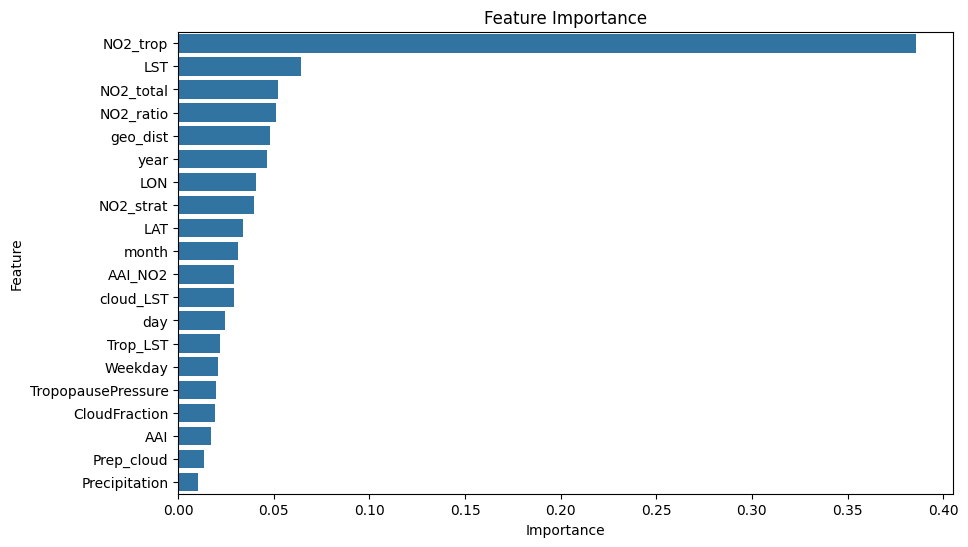

In [92]:
# Graph of the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

**PROJECT REPORT**

- This project focus on the analysis of NO2 content in the atmosphere.
- As well as the exploration of its contributors, to understand the factors that influence the rate and levels of NO2 in a particular location. The project also included a machine learning model that predict a continous value of NO2 level based on the computed features.
- The model development involves various data preprocessing which inlcude;
- data exploration, data cleaning, feature engineering, model selection, training and testing.